In [143]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

1. 데이터 다운로드

In [144]:
origin_data = pd.read_csv("ID-8.txt", sep="\t", header=None)

In [145]:
origin_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,4,40,1,2,5,1,1,3150,1.0,0,0,2,2,4
1,1,4,56,1,2,5,1,1,3636,1.0,0,0,2,2,4
2,1,2,40,1,1,5,1,3,450,1.0,0,0,2,2,4
3,1,2,41,2,1,5,1,2,420,1.0,0,0,2,2,4
4,1,4,37,1,2,6,1,1,5640,1.0,0,0,1,2,6


In [146]:
origin_data.columns = ['location', 'hosusehold_size', 'age', 'sex','maristat', 'school','school2', 'worktype', 'wage', 'jobtype', 'englishtime','english','union' ,'certi', 'ysrsshl']

In [147]:
origin_data.head()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl
0,1,4,40,1,2,5,1,1,3150,1.0,0,0,2,2,4
1,1,4,56,1,2,5,1,1,3636,1.0,0,0,2,2,4
2,1,2,40,1,1,5,1,3,450,1.0,0,0,2,2,4
3,1,2,41,2,1,5,1,2,420,1.0,0,0,2,2,4
4,1,4,37,1,2,6,1,1,5640,1.0,0,0,1,2,6


2. 전치리 1

In [148]:
origin_data.isna().sum()

location           0
hosusehold_size    0
age                0
sex                0
maristat           0
school             0
school2            0
worktype           0
wage               0
jobtype            1
englishtime        0
english            0
union              0
certi              0
ysrsshl            0
dtype: int64

In [149]:
origin_data.dropna(inplace=True)

In [150]:
origin_data['sex'][origin_data['sex'] == 2] = np.zeros(len(origin_data[origin_data['sex'] == 2]))

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_16720\1580575557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin_data['sex'][origin_data['sex'] == 2] = np.zeros(len(origin_data[origin_data['sex'] == 2]))


In [151]:
origin_data.head()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl
0,1,4,40,1,2,5,1,1,3150,1.0,0,0,2,2,4
1,1,4,56,1,2,5,1,1,3636,1.0,0,0,2,2,4
2,1,2,40,1,1,5,1,3,450,1.0,0,0,2,2,4
3,1,2,41,0,1,5,1,2,420,1.0,0,0,2,2,4
4,1,4,37,1,2,6,1,1,5640,1.0,0,0,1,2,6


In [152]:
origin_data.columns

Index(['location', 'hosusehold_size', 'age', 'sex', 'maristat', 'school',
       'school2', 'worktype', 'wage', 'jobtype', 'englishtime', 'english',
       'union', 'certi', 'ysrsshl'],
      dtype='object')

In [153]:
origin_data.describe()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl
count,1366.0,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,1.0,3.368228,42.863836,0.610542,1.955344,5.615666,1.289898,2.361640,10469.993411,1.507321,0.507321,1464.311127,2.538799,1.979502,5.387994
std,0.0,1.171637,11.978817,0.487806,0.830850,1.396811,0.898187,1.699677,89213.745633,0.899095,5.488678,38249.872709,1.059215,0.141747,2.280730
min,1.0,1.000000,17.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,3.000000,33.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1101.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000
50%,1.0,4.000000,42.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1827.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000
75%,1.0,4.000000,52.000000,1.000000,2.000000,7.000000,1.000000,4.000000,3120.000000,2.000000,0.000000,0.000000,4.000000,2.000000,8.000000
max,1.0,7.000000,82.000000,1.000000,5.000000,9.000000,6.000000,6.000000,999999.000000,4.000000,99.000000,999999.000000,4.000000,2.000000,10.000000


In [154]:
origin_data['marrige_exper'] = np.zeros(len(origin_data.index))

In [155]:
for i in range(len(origin_data.index)) :
    if origin_data['maristat'].iloc[i] == 1 :
        origin_data['marrige_exper'].iloc[i] = 0
    else : 
        origin_data['marrige_exper'].iloc[i] = 1

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [156]:
origin_data.describe()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl,marrige_exper
count,1366.0,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,1.0,3.368228,42.863836,0.610542,1.955344,5.615666,1.289898,2.361640,10469.993411,1.507321,0.507321,1464.311127,2.538799,1.979502,5.387994,0.765739
std,0.0,1.171637,11.978817,0.487806,0.830850,1.396811,0.898187,1.699677,89213.745633,0.899095,5.488678,38249.872709,1.059215,0.141747,2.280730,0.423691
min,1.0,1.000000,17.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.0,3.000000,33.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1101.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000
50%,1.0,4.000000,42.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1827.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000
75%,1.0,4.000000,52.000000,1.000000,2.000000,7.000000,1.000000,4.000000,3120.000000,2.000000,0.000000,0.000000,4.000000,2.000000,8.000000,1.000000
max,1.0,7.000000,82.000000,1.000000,5.000000,9.000000,6.000000,6.000000,999999.000000,4.000000,99.000000,999999.000000,4.000000,2.000000,10.000000,1.000000


<AxesSubplot:>

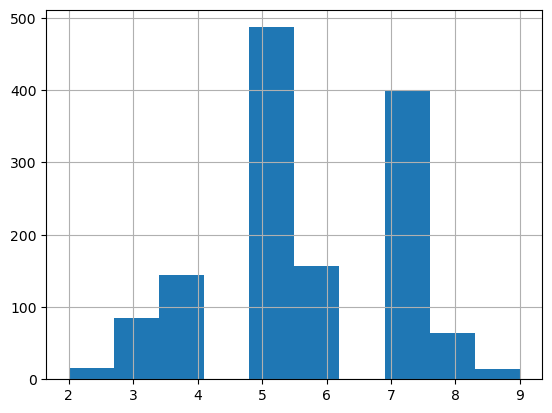

In [157]:
origin_data['school'].hist()

In [158]:
origin_data['upper_4yrs_univ'] = np.zeros(len(origin_data.index))

In [159]:
origin_data['school'] = origin_data['school'].apply(int)

In [160]:
origin_data['school']

0       5
1       5
2       5
3       5
4       6
       ..
1362    7
1363    5
1364    7
1365    3
1366    5
Name: school, Length: 1366, dtype: int64

In [161]:
for i in range(len(origin_data.index)) :
    if origin_data['school'].iloc[i] == 7 or origin_data['school'].iloc[i] == 8 or origin_data['school'].iloc[i] == 9 :
        origin_data['upper_4yrs_univ'].iloc[i] = 1
    else : origin_data['upper_4yrs_univ'].iloc[i] = 0

c:\Users\Popperkim\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [162]:
origin_data.describe()

,location,hosusehold_size,age,sex,maristat,school,school2,worktype,wage,jobtype,englishtime,english,union,certi,ysrsshl,marrige_exper,upper_4yrs_univ
count,1366.0,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,1.0,3.368228,42.863836,0.610542,1.955344,5.615666,1.289898,2.361640,10469.993411,1.507321,0.507321,1464.311127,2.538799,1.979502,5.387994,0.765739,0.349195
std,0.0,1.171637,11.978817,0.487806,0.830850,1.396811,0.898187,1.699677,89213.745633,0.899095,5.488678,38249.872709,1.059215,0.141747,2.280730,0.423691,0.476890
min,1.0,1.000000,17.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.0,3.000000,33.000000,0.000000,2.000000,5.000000,1.000000,1.000000,1101.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,0.000000
50%,1.0,4.000000,42.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1827.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,0.000000
75%,1.0,4.000000,52.000000,1.000000,2.000000,7.000000,1.000000,4.000000,3120.000000,2.000000,0.000000,0.000000,4.000000,2.000000,8.000000,1.000000,1.000000
max,1.0,7.000000,82.000000,1.000000,5.000000,9.000000,6.000000,6.000000,999999.000000,4.000000,99.000000,999999.000000,4.000000,2.000000,10.000000,1.000000,1.000000


In [163]:
modeling = origin_data[['age', 'sex', 'school', 'wage', 'worktype', 'ysrsshl']]

In [164]:
reg1 = smf.logit("marrige_exper ~ wage + sex*upper_4yrs_univ", data = origin_data).fit()
print(reg1.summary())

Optimization terminated successfully.
         Current function value: 0.530713
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          marrige_exper   No. Observations:                 1366
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                            4
Date:                Sat, 03 Jun 2023   Pseudo R-squ.:                 0.02509
Time:                        22:37:31   Log-Likelihood:                -724.95
converged:                       True   LL-Null:                       -743.61
Covariance Type:            nonrobust   LLR p-value:                 1.548e-07
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.3065      0.125     10.420      0.000       1.061       1.552
wa